In [1]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
from IPython.display import Image  
from graphviz import Source

import numpy as np

from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist, cifar10

Using TensorFlow backend.


8


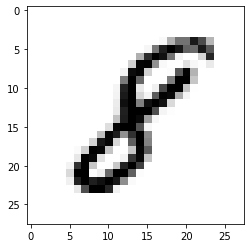

In [5]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')



In [8]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
loss = model.fit(x=x_train,y=y_train, epochs =50)


Epoch 1/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1039 - accuracy: 0.9687
Epoch 2/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0938 - accuracy: 0.9708
Epoch 3/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0869 - accuracy: 0.9730
Epoch 4/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0796 - accuracy: 0.9750
Epoch 5/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0756 - accuracy: 0.9762
Epoch 6/50
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0724 - accuracy: 0.9770
Epoch 7/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0682 - accuracy: 0.9787
Epoch 8/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0645 - accuracy: 0.9784
Epoch 9/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0624 - accuracy: 0.9797
Epoch 10/50
1875/1875 [==============================] - 31s 17m

No handles with labels found to put in legend.


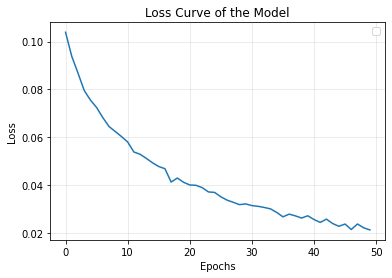

In [17]:
plt.plot(range(50),loss.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve of the Model')
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()

In [18]:
# Calculate Test loss and Test Accuracy
print('Loss and Accuracy of the Model:', model.evaluate(x_test, y_test))


313/313 [==============================] - 2s 7ms/step - loss: 0.0698 - accuracy: 0.9832
Loss and Accuracy of the Model: [0.06983453780412674, 0.9832000136375427]


9


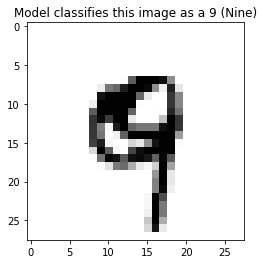

In [19]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.title('Model classifies this image as a 9 (Nine)')
print(pred.argmax())